<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/Lab5_2348561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import warnings
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn - WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)

<Axes: >

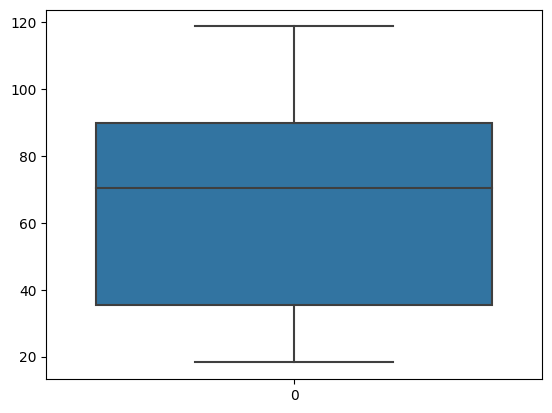

In [ ]:
sns.boxplot(data['MonthlyCharges'])

<Axes: >

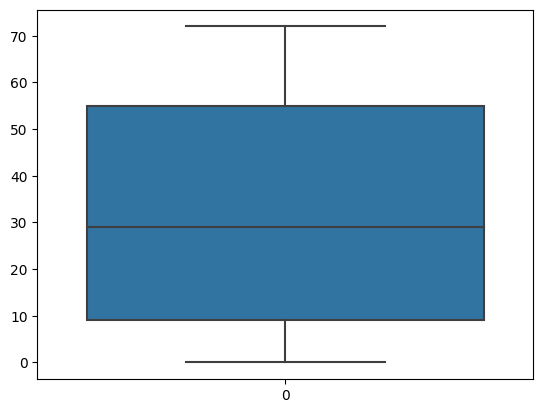

In [ ]:
sns.boxplot(data['tenure'])

In [ ]:
categorical=data[['gender','Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical.columns:
  le=LabelEncoder()
  categorical[col]=le.fit_transform(categorical[col])

<ipython-input-8-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[col]=le.fit_transform(categorical[col])
<ipython-input-8-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[col]=le.fit_transform(categorical[col])
<ipython-input-8-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,1,2,1


In [ ]:
numerical=data[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

In [ ]:
newdata=pd.concat([numerical, categorical], axis=1)
print(newdata)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  Partner  \
0                 0       1           29.85         29.85       0        1   
1                 0      34           56.95       1889.50       1        0   
2                 0       2           53.85        108.15       1        0   
3                 0      45           42.30       1840.75       1        0   
4                 0       2           70.70        151.65       0        0   
...             ...     ...             ...           ...     ...      ...   
7038              0      24           84.80       1990.50       1        1   
7039              0      72          103.20       7362.90       0        1   
7040              0      11           29.60        346.45       0        1   
7041              1       4           74.40        306.60       1        1   
7042              0      66          105.65       6844.50       1        0   

      Dependents  PhoneService  MultipleLines  InternetService 

In [ ]:
newdata.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,1,2,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newdata.drop('Churn',axis=1),data['Churn'],test_size=None,random_state=0)
X_train.shape,X_test.shape

((5282, 18), (1761, 18))

In [ ]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3296,0,24,49.30,1233.25,0,0,0,1,0,0,0,2,0,0,0,0,1,1
6397,1,54,65.25,3529.95,1,0,0,1,0,0,0,2,2,0,2,1,0,0
6043,0,3,40.15,130.75,1,0,0,0,1,0,0,2,0,2,0,0,1,3
5309,0,61,20.25,1278.80,0,1,0,1,0,2,1,1,1,1,1,2,0,1
3000,0,12,84.45,1059.55,1,0,0,1,2,1,0,0,0,2,0,0,1,2


In [ ]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2200,0,19,58.20,1045.25,0,0,0,1,0,0,0,0,0,2,0,1,0,2
4627,0,60,116.60,7049.50,1,0,0,1,2,1,2,2,2,2,2,1,1,1
3225,0,13,71.95,923.85,0,0,0,1,0,0,2,0,0,2,2,0,1,2
2828,0,1,20.45,20.45,1,0,0,1,0,2,1,1,1,1,1,2,0,3
3768,0,55,77.75,4266.40,0,1,0,1,2,1,0,0,0,0,0,0,1,1


In [ ]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [ ]:
y_test.head()

2200    No
4627    No
3225    No
2828    No
3768    No
Name: Churn, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
TN = cm[0,0]
FN = cm[1,0]
TP = cm[1,1]
FP = cm[0,1]
precision =(TP)/(TP+FP)
accuracy_model =(TP+TN)/(TP+TN+FP+FN)
recall_score =(TP)/(TP+FN)
specificity_value=(TN)/(TN + FP)

False_positive_rate =(FP)/(FP+TN)
False_negative_rate =(FN)/(FN+TP)
f1_score =2*(( precision * recall_score)/( precision + recall_score))
print("Precision value of the model: ",precision)
print("Accuracy of the model: ",accuracy_model)

Precision value of the model:  0.6135265700483091
Accuracy of the model:  0.7904599659284497


In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8017796289284362


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7904599659284497


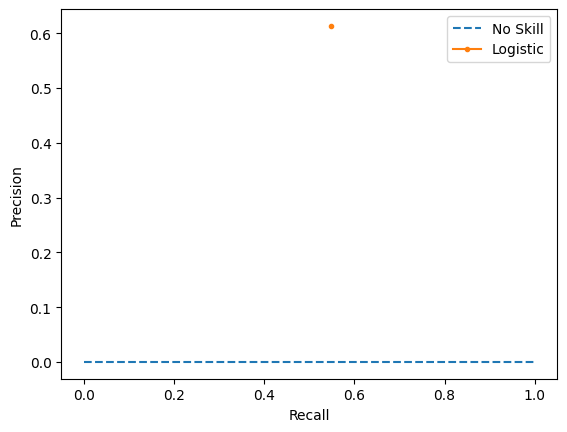

In [ ]:
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Churn')
plt.plot(recall_score, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
print("f1 Score of the model:",f1_score)
print("Recall Score of the model:",recall_score)


f1 Score of the model: <function f1_score at 0x7e921049e440>
Recall Score of the model: <function recall_score at 0x7e921049e8c0>


In [ ]:
err_metric(cm)

Precision value of the model:  0.6135265700483091
Accuracy of the model:  0.7904599659284497


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.827


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


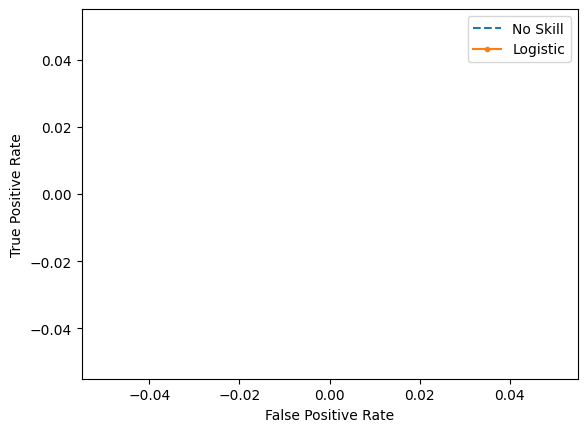

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label=1)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label=1)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

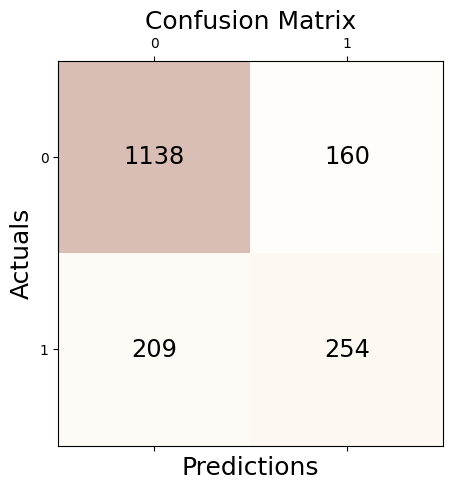

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(TP, FP)


NameError: ignored

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(TP, FP)

NameError: ignored

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

In [ ]:
try_parameters(60, 200)


In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

In [ ]:
try_parameters(w, b)


In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)